# Cleaning & Analyzing Employee Exit Surveys

In this project we'll work with exit surveys from employees of the [Department of Education, Training and Employment (DETE)](https://en.wikipedia.org/wiki/Department_of_Education_and_Training_(Queensland)) and the Technical and Further Education (TAFE) institute in Queensland, Australia. You can find the TAFE exit survey [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) and the survey for the DETE [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey).

In this project we want to know the following:
* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

We are asked to combine both surveys to answer these questions. Nevertheless, although both used the same survey template, one of them customized some of the answers. We'll aim to do most of the data cleaning and get us started analyzing the first question.

Let's start by reading in the datasets and exploring them.

__Disclaimer:__ This is one of the projects done as part of the guided project series on [dataquest](https://www.dataquest.io/).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

print(dete_survey.shape)
print(tafe_survey.shape)

(822, 56)
(702, 72)


In [3]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [4]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [5]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

In [6]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


We can observe that the survey data contians various features and that not all of the questions will be useful to us. 
A data dictionary wasn't provided with the dataset so we'll use our general knowledge to define the columns.

Below is a preview of a couple columns we'll work with from the `dete_survey.csv`:
* `ID`:  An id used to identify the participant of the survey
* `SeparationType`: The reason why the person's employment ended
* `Cease Date`: The year or month the person's employment ended
* `DETE Start Date`: The year the person began employment with the DETE

Below is a preview of a couple columns we'll work with from the `tafe_survey.csv`:

* `Record ID`: An id used to identify the participant of the survey
* `Reason for ceasing employment`: The reason why the person's employment ended
* `LengthofServiceOverall. Overall Length of Service at Institute (in years)`: The length of the person's employment (in years).

Let's check how many missing / null values do we have.

In [7]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [8]:
tafe_survey.isnull().sum()

Record ID                                                                      0
Institute                                                                      0
WorkArea                                                                       0
CESSATION YEAR                                                                 7
Reason for ceasing employment                                                  1
                                                                            ... 
CurrentAge. Current Age                                                      106
Employment Type. Employment Type                                             106
Classification. Classification                                               106
LengthofServiceOverall. Overall Length of Service at Institute (in years)    106
LengthofServiceCurrent. Length of Service at current workplace (in years)    106
Length: 72, dtype: int64

## Identify Missing Values and Drops Unnecessary Columns

Here are some of the observations based on the analysis above

* Both of our datasets have a large number of columns. We don't need all of them to complete our analysis.
* While `tafe` dataframe contains more columns than `dete`, quite a few of them are similar
* Some of the values in dete has "Not Stated" which we can consider as null or as a separate category

We can use `pd.read_csv()` to read 'Not Stated' as na when reading in the dataset. Next, we will do exactly that as well as drop columns we don't need for our analysis.

In [9]:
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')

In [10]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


Now, let's drop some columns we don't need for our analysis. From `dete_survey` we will drop columns from `Professional Development` to `Health & Safety`. These columns will not be useful for our analysis.
From `tafe_survey` we will drop columns from `Main Factor. Which of these was the main factor for leaving?` till basically 'Gender: What is your Gender?' column. This is because we are interested in Contributing Factors instead of Institute Views and Work Views.

In [11]:
# drop columns from dete_survey
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)

# drop columns from tafe_survey
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

## Clean Column Names

As we mentioned above, column names from each of the dataframes are different even though they convey similar information. Below are some of the columns we'd like to use for our final analysis:

| dete_survey | tafe_survey | Definition |
|-------------|-------------|------------|
| ID | Record ID | Definition | An id used to identify the participant of the survey |
| Separation Type | Reason for ceasing employment | The reason why the participant's employment ended |
| Cease Date | CESSATION YEAR | The year or month the participant's employment ended |
| DETE Start Date | __ |The year the participant began employment with the DETE |
| __ | LengthofServiceOverall. Overall Length of Service at Institute (in years) | The length of the person's employment (in years) |
| Age | CurrentAge. Current Age | The age of the participant |
| Gender | Gender. What is your Gender? | The gender of the participant |

Next, since we merge these dataframes into one, we need to standardize the column names in order to bring them together later on. We will perform the following in the `dete_survey_updated` columns:

* Make all the capitalization lowercase.
* Remove any trailing whitespace from the end of the strings.
* Replace spaces with underscores ('_').

In [12]:
# perform the above column cleaning
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(" ", "_")

# check the results
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

To update the columns in `tafe_survey_updated` we will rename the existing columns in the following way:
* 'Record ID': 'id'
* 'CESSATION YEAR': 'cease_date'
* 'Reason for ceasing employment': 'separationtype'
* 'Gender. What is your Gender?': 'gender'
* 'CurrentAge. Current Age': 'age'
* 'Employment Type. Employment Type': 'employment_status'
* 'Classification. Classification': 'position'
* 'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service'
* 'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'


In [13]:
tafe_new_cols = {
    'Record ID': 'id',
    'CESSATION YEAR': 'cease_date',
    'Reason for ceasing employment': 'separationtype',
    'Gender. What is your Gender?': 'gender',
    'CurrentAge. Current Age': 'age',
    'Employment Type. Employment Type': 'employment_status',
    'Classification. Classification': 'position',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
    'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
}
tafe_survey_updated.rename(tafe_new_cols, axis=1, inplace=True)

Let's check the results.

In [14]:
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [15]:
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


We can see that we have updated our columns names in each dataset to match each other.

## Filter the Data

We have successfully renamed the columns that we will use for our analysis. Next we will drop the columns that we don't need for our analysis. Let's review our end goal. It is to answer the following question:

* Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

In [16]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [17]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

If we look at the unique values in the `separationtype` columns in each dataframe, we'll see that each contains a couple of different separation types. For this project, we'll only analyze survey respondents who resigned, so their separation type contains the string `'Resignation'`.

Note that dete_survey_updated dataframe contains multiple separation types with the string 'Resignation':

* Resignation-Other reasons
* Resignation-Other employer
* Resignation-Move overseas/interstate

Remember that we'll have to account for each of these variations so we don't unintentionally drop data!

Let's now filter all of the data that falls under our requirement.

In [18]:
# get index of the rows  that contain 'Resignation'
dete_res_mask = dete_survey_updated['separationtype'].str.contains('Resignation')
tafe_res_mask = tafe_survey_updated['separationtype'] == 'Resignation'

# filter the dataset and create a true copy 
dete_resignations = dete_survey_updated[dete_res_mask].copy(deep=True)
tafe_resignations = tafe_survey_updated[tafe_res_mask].copy(deep=True)

In the above code we have created masks for each of the datasets that contains boolean values for rows that fall under our criteria. Then we simply made deep copies of the dataframes in order to avoid [SettingwithCopyWarning](https://www.dataquest.io/blog/settingwithcopywarning/).

## Verify the Data

Next, we need to verify that our data doesn't contain any inconsistencies or is not corrupted in any way. It may not always be possible to catch all of these errors, but by making sure the data seems reasonable to the best of our knowledge, we can stop ourselves from completing a data analysis project that winds up being useless because of bad data. 

In this step, we'll focus on verifying that the years in the `cease_date` and `dete_start_date` columns make sense. However, we encourage you to check the data for other issues as well!

* Since the `cease_date` is the last year of the person's employment and the `dete_start_date` is the person's first year of employment, it wouldn't make sense to have years after the current date.
* Given that most people in this field start working in their 20s, it's also unlikely that the `dete_start_date` was before the year 1940.
* We will also watch out for any dates in the far past or any dates in the future.

If we have many years higher than the current date or lower than 1940, we wouldn't want to continue with our analysis, because it could mean there's something very wrong with the data. If there are a small amount of values that are unrealistically high or low, we can remove them.

Let's examine `cease_date` closely.

In [19]:
dete_resignations['cease_date'].value_counts(dropna=False).sort_index()

01/2014     22
05/2012      2
05/2013      2
06/2013     14
07/2006      1
07/2012      1
07/2013      9
08/2013      4
09/2010      1
09/2013     11
10/2013      6
11/2013      9
12/2013     17
2010         1
2012       126
2013        74
NaN         11
Name: cease_date, dtype: int64

In [20]:
tafe_resignations['cease_date'].value_counts(dropna=False).sort_index()

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
NaN         5
Name: cease_date, dtype: int64

We can observe right away that we need to extract the year from `dete_resignations`, in order to keep the data consistent. We also have `NaN` values in both of our datasets. In `dete_resignations` the minimum and maximum year is 2006 and 2014 respectively while in `tafe_resignations` the min, max year is 2009 and 2013.

In [21]:
# extract year from dete and convert to float
dete_resignations['cease_date'] = dete_resignations['cease_date'].str[-4:].astype(float)

Let's check `dete_start_date` column for inconsistencies as well.

In [22]:
dete_resignations['dete_start_date'].value_counts(dropna=False).sort_index()

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
NaN       28
Name: dete_start_date, dtype: int64

The data here seems ok, but we need to check in dete dataset if there are any values where `cease_date` is earlier than `dete_start_date`.

In [23]:
print(dete_resignations[dete_resignations['cease_date'] == dete_resignations['dete_start_date']].shape)
dete_resignations[dete_resignations['cease_date'] < dete_resignations['dete_start_date']].shape

(20, 35)


(0, 35)

Even though there are no records where `cease_date` is earlier than `dete_start_date`, there are employees who have quit the job the same year as they were employed. This is just an interesting observation to keep in mind.

As we have seen above though, there are records where we don't have information about the year, so we will drop those records.

In [24]:
# drop na values across cease_date
dete_resignations.dropna(axis=0, subset=['cease_date', 'dete_start_date'], inplace=True)
tafe_resignations.dropna(axis=0, subset=['cease_date'], inplace=True)

To summarize, we saw that:

* There are no major issues with year
* The years span across different range in each dataset
* Some rows contained no `cease_date`

## Create a new column

Now that we've verified the years in the dete_resignations dataframe, we'll use them to create a new column. Recall that our end goal is to answer the following question:

* Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

In the Human Resources field, the length of time an employee spent in a workplace is referred to as their years of service. In `tafe_resignations` dataset we have the `institute_service` column which represents the years in service, while in `dete_resignations` we don't have this information. Nevertheless, we can substract `cease_date` from `dete_start_date` to find this information. Next, we will do that.

In [25]:
# calculate service years
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

# check
dete_resignations['institute_service'].value_counts().sort_index()

0.0     20
1.0     22
2.0     14
3.0     20
4.0     16
5.0     23
6.0     17
7.0     13
8.0      8
9.0     14
10.0     6
11.0     4
12.0     6
13.0     8
14.0     6
15.0     7
16.0     5
17.0     6
18.0     5
19.0     3
20.0     7
21.0     3
22.0     6
23.0     4
24.0     4
25.0     2
26.0     2
27.0     1
28.0     2
29.0     1
30.0     2
31.0     1
32.0     3
33.0     1
34.0     1
35.0     1
36.0     2
38.0     1
39.0     3
41.0     1
42.0     1
49.0     1
Name: institute_service, dtype: int64

We now have year of service for each employee as `institute_service` in both dataframes. This will help us in our analysis in order to determine how long an employee worked.

## Identifying Dissatisfied Employees

In the last screen, we created a new institute_service column that we'll use to analyze survey respondents according to their length of employment.Next, we'll identify any employees who resigned because they were dissatisfied.

Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe.

1. tafe_survey_updated:
    * Contributing Factors. Dissatisfaction
    * Contributing Factors. Job Dissatisfaction
2. dete_survey_updated:
    * job_dissatisfaction
    * dissatisfaction_with_the_department
    * physical_work_environment
    * lack_of_recognition
    * lack_of_job_security
    * work_location
    * employment_conditions
    * work_life_balance
    * workload
    
If the employee indicated any of the factors above caused them to resign, we'll mark them as `dissatisfied` in a new column.

Let's examine the `tafe_resignations` dissatisfaction criteria we chose above closely.

In [26]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

-                                         275
Contributing Factors. Dissatisfaction      53
NaN                                         7
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [27]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

-                      266
Job Dissatisfaction     62
NaN                      7
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

We observe that those two columns contain either a value, dash (-) indicating that column not being a reason and NaN where the value is simply missing. We proceed with converting these columns into `True`, `False` and `NaN`. To do that we write a function.

In [28]:
# function to convert values to boolean and nan
def update_val(data):
    if pd.isnull(data):
        return np.nan
    elif data == '-':
        return False
    else:
        return True
    
# apply the function to needed columns
cols = ['Contributing Factors. Job Dissatisfaction', 'Contributing Factors. Dissatisfaction']
tafe_resignations[cols] =  tafe_resignations[cols].applymap(update_val)

# check values
tafe_resignations[cols].head(2)

,Contributing Factors. Job Dissatisfaction,Contributing Factors. Dissatisfaction
3,False,False
4,False,False


Next, we will create a new column in both datasets, which we will call 'dissatisfied'. We will add a `True` value to this column if an employee has shown any of the above mentioned columns for each of the dataframes.

In [29]:
# columns across which we check for dissatisfaction
dete_cols = ['job_dissatisfaction', 'dissatisfaction_with_the_department', 'physical_work_environment', 'lack_of_recognition',
             'lack_of_job_security', 'work_location', 'employment_conditions', 'work_life_balance', 'workload']
tafe_cols = ['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']


# create new feature and assign boolean based on the above cols
dete_resignations['dissatisfied'] = dete_resignations[dete_cols].any(axis=1, skipna=False)
tafe_resignations['dissatisfied'] = tafe_resignations[tafe_cols].any(axis=1, skipna=False)

# create a copy for further analysis
dete_resignations_up = dete_resignations.copy(deep=True)
tafe_resignations_up = tafe_resignations.copy(deep=True)

Here, we have create a new column which is True if any of the survey columns has been answered (is True).

## Combine the Data

To recap, we've accomplished the following:

* Renamed our columns
* Dropped any data not needed for our analysis
* Verified the quality of our data
* Created a new institute_service column
* Cleaned the Contributing Factors columns
* Created a new column indicating if an employee resigned because they were dissatisfied in some way

Now, we're finally ready to combine our datasets! Our end goal is to aggregate the data according to the `institute_service` column.

In [30]:
# add institute names to each dataset for differentiation
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

# combine dataframes
combined = pd.concat([dete_resignations_up, tafe_resignations_up], sort=False)

# drop columns with more less than 500 non-null values
combined_updated = combined.dropna(axis=1, thresh=500).copy(deep=True)

# check values
combined_updated.head()

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute
3,4.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,7,False,DETE
5,6.0,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18,True,DETE
8,9.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,31-35,3,False,DETE
9,10.0,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15,True,DETE
11,12.0,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,Male,31-35,3,False,DETE


In the code above we have

* Added a new `institute` column to each dataframe
* Combined the dataframes into new `combined`
* Dropped columns where 500 non-na values requirement was not met. This was done in order to remove all of the columns from both datasets that we don't need for our analysis

## Clean the Service Column

Now that we've combined our dataframes, we're almost at a place where we can perform some kind of analysis! First, though, we'll have to clean up the `institute_service` column. Let's check why.

In [31]:
combined_updated.head()

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute
3,4.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,7,False,DETE
5,6.0,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18,True,DETE
8,9.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,31-35,3,False,DETE
9,10.0,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15,True,DETE
11,12.0,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,Male,31-35,3,False,DETE


In [32]:
combined_updated['institute_service'].value_counts(dropna=False)

Less than 1 year      73
1-2                   64
3-4                   63
NaN                   47
5-6                   33
11-20                 24
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
22.0                   6
17.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
19.0                   3
32.0                   3
21.0                   3
39.0                   3
30.0                   2
25.0                   2
26.0                   2
28.0                   2
36.0                   2


This column is tricky to clean because it currently contains values in a couple different forms as we can see above. 

To analyze the data, we'll convert these numbers into categories. We'll base our anlaysis [on this article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage), which makes the argument that understanding employee's needs according to career stage instead of age is more effective.

We'll use the slightly modified definitions below:

* New: Less than 3 years at a company
* Experienced: 3-6 years at a company
* Established: 7-10 years at a company
* Veteran: 11 or more years at a company

Let's categorize the values in the `institute_service` column using the definitions above.

To accomplish the above we will extract the digits from `institute_service` column and we only extract the first digit.

In [33]:
# extract years of service from the column
years_of_service = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)', expand=False).astype(float)

Next, we'll map each value to one of the career stage definitions above. To do that we write a function. We need to handle `NaN` values separately and we will just drop them

In [34]:
# function to map the service according to definitions above
def map_service(data):
    if pd.isnull(data):
        return np.nan
    elif data < 3:
        return 'New'
    elif data < 7: 
        return 'Experienced'
    elif data < 10:
        return 'Established'
    elif data > 11:
        return 'Veteran'
    
# apply the function to generate categories
combined_updated['service_cat'] = years_of_service.apply(map_service)

# check results
combined_updated.head()

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute,service_cat
3,4.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,7,False,DETE,Established
5,6.0,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18,True,DETE,Veteran
8,9.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,31-35,3,False,DETE,Experienced
9,10.0,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15,True,DETE,Veteran
11,12.0,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,Male,31-35,3,False,DETE,Experienced


## Perform Initial Analysis

Now that we have created a `service_cat` column, we can proceed with our analysis. Let's explore our `dissatisfied` column.

In [35]:
# check value counts for dissatisfied
combined_updated['dissatisfied'].value_counts(dropna=False)

False    375
True     226
NaN        7
Name: dissatisfied, dtype: int64

We only have 7 `NaN` values and we can replace them with the mode (most frequent value) of this column which is `True`. This won't impact our analysis as much since we only have 7 `NaN` values.

In [36]:
# fill na values with True
combined_updated['dissatisfied'].fillna(True, inplace=True)

Now, we can use `DataFrame.pivot_table()` method to find the percentage of dissatisfied customers in easch `service_cat`. Since the method treats `True` values as 1 it will use mean as aggregation function to calculate the percentage of dissatisfied employees.

In [37]:
# calculate percentages
pd.pivot_table(combined_updated, values='dissatisfied', index='service_cat', aggfunc=[np.mean, np.sum])

,mean,sum
,dissatisfied,dissatisfied
service_cat,,
Established,0.553571,31.0
Experienced,0.343023,59.0
New,0.295337,57.0
Veteran,0.556604,59.0


We can also use a different method to generate similar results. We can use pandas groupby to calculate the same metrics plus for each category we can get the total values.

In [38]:
combined_updated[['service_cat', 'dissatisfied']].groupby(by='service_cat').agg(['mean', 'sum', 'count'])

dissatisfied            
                    mean   sum count
service_cat                         
Established     0.553571  31.0    56
Experienced     0.343023  59.0   172
New             0.295337  57.0   193
Veteran         0.556604  59.0   106

To get a better understanding of our data we can visualize the results.

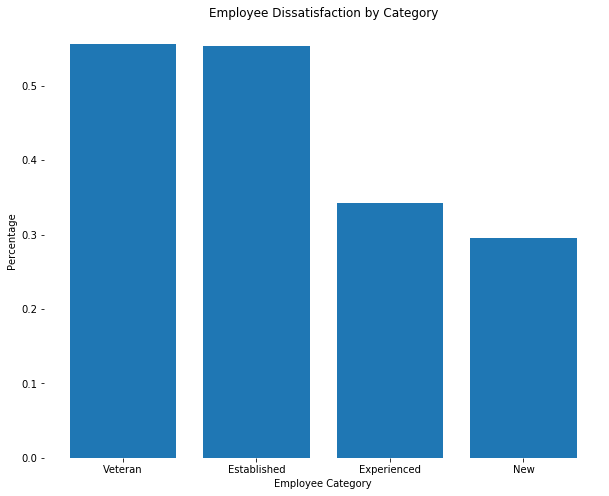

In [39]:
# save the result into a dataframe and sort the results by mean
# results = pd.pivot_table(combined_updated, values='dissatisfied', index='service_cat', aggfunc=[np.mean]).sort_values(results.columns[0], ascending=False)

# we will use groupby since its easier to modify the matplot figure generated
results = combined_updated[['service_cat', 'dissatisfied']].groupby(by='service_cat').mean().sort_values('dissatisfied', ascending=False)

# separate the values from the dataframe for easy plotting
xvals = results.index.tolist()
yvals = results.values.flatten().tolist()

# generate a customized bar plot
fig, ax = plt.subplots(figsize=(10,8))
ax.bar(xvals, yvals)
ax.set_xlabel('Employee Category')
ax.set_ylabel('Percentage')
ax.set_title('Employee Dissatisfaction by Category')
[ax.spines[i].set_visible(False) for i in ax.spines]
plt.show()

From the bar chart above, we can infer that employees who have worked in the company for more than 7 years have higher level of dissatisfaction, than those that are New and Experienced.

## Summary so far

In order to come to this point in our analysis we have done the following:

* Explored the data and figured out how to prepare it for analysis
* Corrected some of the missing values
* Dropped any data not needed for our analysis
* Renamed our columns
* Verified the quality of our data
* Created a new institute_service column
* Cleaned the Contributing Factors columns
* Created a new column indicating if an employee resigned because they were dissatisfied in some way
* Combined the data
* Cleaned the institute_service column
* Handled the missing values in the dissatisfied column
* Aggregated the data

In our analysis we have answered the following questions:

1. Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
2. Are younger employees resigning due to some kind of dissatisfaction? What about older employees?
3. How many people in each career stage resigned due to some kind of dissatisfaction? 

Nevertheless, we have not finished our analysis. After exploring our data throughout I would like to dive into the dataset a bit more and try to answer the following questions:

1. How many people in each age group resgined due to some kind of dissatisfaction?
2. Instead of analyzing the survey results together, we analyze each survey separately. Did more employees in the DETE survey or TAFE survey end their employment because they were dissatisfied in some way? 

TBD